In [13]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

Index(['gid', 'objectid', 'sampleno', 'X', 'Y', 'Si02__', 'Al2O3__', 'Fe2O3__',
       'TiO2__', 'CaO__', 'MgO__', 'MnO__', 'Na2O__', 'K2O__', 'P2O5__', 'LOI',
       'Ba_ppm', 'Ga_ppm', 'Sc_ppm', 'V_ppm', 'Th_ppm', 'Pb_ppm', 'Ni_ppm',
       'Co_ppm', 'Rb_ppm', 'Sr_ppm', 'Y_ppm', 'Zr_ppm', 'Nb_ppm', 'Cr_ppm',
       'Cu_ppm', 'Zn_ppm', 'Au_ppb', 'Li_ppm', 'Cs_ppm', 'As_ppm', 'Sb_ppm',
       'Bi_ppm', 'Se_ppm', 'Ag_ppm', 'Cd_ppm', 'Hg_ppb', 'Be_ppm', 'Ge_ppm',
       'Mo_ppm', 'Sn_ppm', 'La_ppb', 'Ce_ppb', 'Pr_ppb', 'Nd_ppb', 'Sm_ppb',
       'Eu_ppb', 'Tb_ppb', 'Gd_ppb', 'Dy_ppb', 'Ho_ppb', 'Er_ppb', 'Tm_ppb',
       'Yb_ppb', 'Lu_ppb', 'Hf_ppm', 'Ta_ppm', 'W_ppm', 'U_ppm', 'Pt_ppb',
       'Pd_ppb', 'In_ppm', 'F_ppm', 'Te_ppm', 'Tl_ppm', 'geometry'],
      dtype='object')
gid         0
objectid    0
sampleno    0
X           0
Y           0
           ..
In_ppm      0
F_ppm       0
Te_ppm      0
Tl_ppm      0
geometry    0
Length: 71, dtype: int64


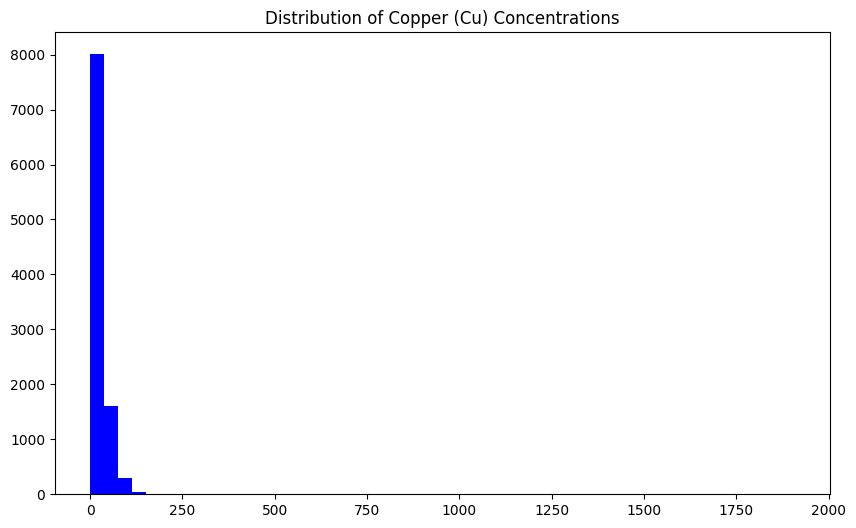

In [14]:
# Load geochemical data (stream sediments)
geochem_path = "../datasets/Geochemical data_GIS/stream_sediments_gcs_ngdr_20250221140319808/stream_sediments_gcs_ngdr.shp"
geochem = gpd.read_file(geochem_path)

# Check columns & missing values
print(geochem.columns)
print(geochem.isnull().sum())

# Plot element distributions (e.g., Copper)
plt.figure(figsize=(10, 6))
plt.hist(geochem['Cu_ppm'].dropna(), bins=50, color='blue')
plt.title("Distribution of Copper (Cu) Concentrations")
plt.savefig("cu_distribution.png")

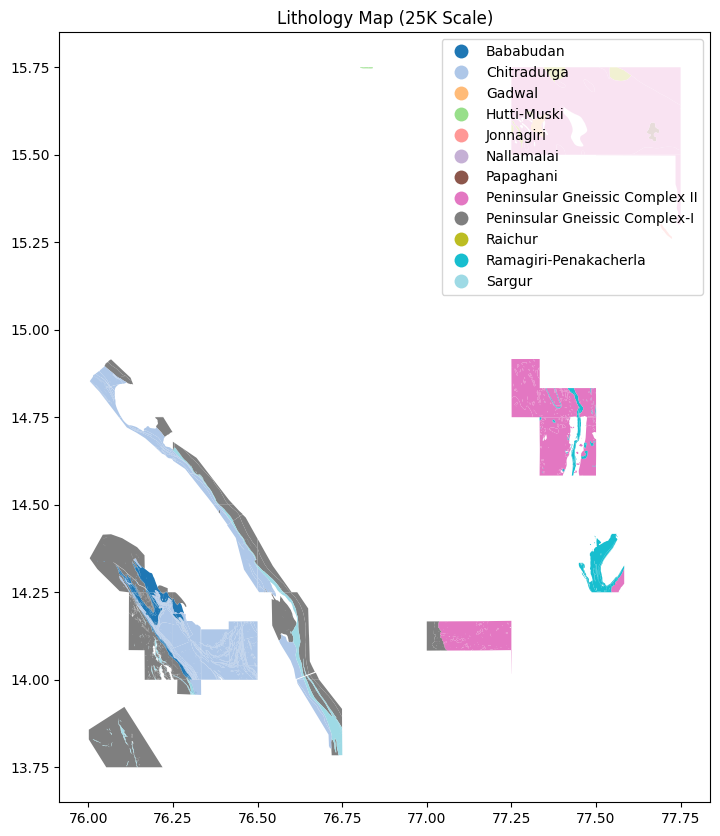

In [15]:
# Load lithology data
litho_path = "../datasets/Multi-Layer_Geological_Map_of_Karnataka_and_Andhra_Pradesh_25K_Scale/lithology_25k_ngdr_20250224140917945/lithology_25k_ngdr.shp"
litho = gpd.read_file(litho_path)

# Plot rock types using the 'group_name' column
litho.plot(column='group_name', cmap='tab20', legend=True, figsize=(15, 10))
plt.title("Lithology Map (25K Scale)")
plt.savefig("lithology_map.png")

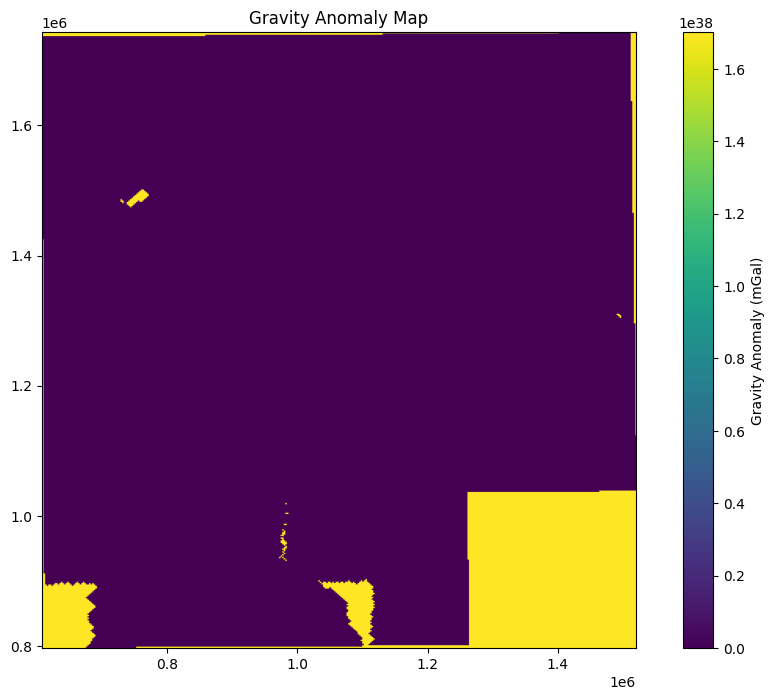

In [16]:
import rasterio
from rasterio.plot import show

# Load GeoTIFF
gravity_path = "../datasets/Ground_gravity_asci_grid_geotiff/GEOTIFF/NGPM_BA.tiff"
gravity = rasterio.open(gravity_path)

# Plot
plt.figure(figsize=(12, 8))
gravity_data = gravity.read(1)  # Read the first band of the raster
img = plt.imshow(gravity_data, cmap='viridis', extent=gravity.bounds, origin='upper')
plt.colorbar(img, label='Gravity Anomaly (mGal)')
plt.title("Gravity Anomaly Map")
plt.savefig("gravity_anomaly.png")

In [17]:
# Generate a missing values report for all datasets
def missing_values_report(gdf):
    return pd.DataFrame({
        'Column': gdf.columns,
        'Missing %': (gdf.isnull().mean() * 100).round(2)
    })

print("Geochemical Data Missing Values:")
print(missing_values_report(geochem))

print("\nLithology Data Missing Values:")
print(missing_values_report(litho))

Geochemical Data Missing Values:
            Column  Missing %
gid            gid        0.0
objectid  objectid        0.0
sampleno  sampleno        0.0
X                X        0.0
Y                Y        0.0
...            ...        ...
In_ppm      In_ppm        0.0
F_ppm        F_ppm        0.0
Te_ppm      Te_ppm        0.0
Tl_ppm      Tl_ppm        0.0
geometry  geometry        0.0

[71 rows x 2 columns]

Lithology Data Missing Values:
                Column  Missing %
gid                gid       0.00
input_cent  input_cent       0.00
edition_no  edition_no       0.00
toposheet_  toposheet_       0.00
geometry_i  geometry_i     100.00
stratigrap  stratigrap       0.11
supergroup  supergroup      24.31
group_name  group_name      19.56
sub_group    sub_group     100.00
formation    formation      29.48
member          member     100.00
lithologic  lithologic       0.00
standard_l  standard_l       0.00
geochronol  geochronol     100.00
g_age_erro  g_age_erro      99.44
g_age_sy

In [18]:
print("Geochemical CRS:", geochem.crs)
print("Lithology CRS:", litho.crs)

Geochemical CRS: EPSG:4326
Lithology CRS: EPSG:4326


In [19]:
import numpy as np
geochem['Cu_ppm_log'] = np.log1p(geochem['Cu_ppm'])

In [20]:
geochem['Cu_Zn_ratio'] = geochem['Cu_ppm'] / geochem['Zn_ppm']
geochem['Ni_Cr_ratio'] = geochem['Ni_ppm'] / geochem['Cr_ppm']  # For PGEs

In [21]:
litho = litho.drop(columns=['geometry_i', 'remarks'])  # 100% missing

In [22]:
# Check available columns in litho
print("Available columns in litho:", litho.columns)

# Replace 'ROCKTYPE' with the correct column name if it exists
# Assuming the correct column name is 'rocktype' based on the context
if 'rocktype' in litho.columns:
	litho['rocktype_encoded'] = litho['rocktype'].astype('category').cat.codes
else:
	print("Column 'ROCKTYPE' or 'rocktype' not found in litho GeoDataFrame.")

Available columns in litho: Index(['gid', 'input_cent', 'edition_no', 'toposheet_', 'stratigrap',
       'supergroup', 'group_name', 'sub_group', 'formation', 'member',
       'lithologic', 'standard_l', 'geochronol', 'g_age_erro', 'g_age_syst',
       'g_material', 'texture', 'major_mine', 'accessory_', 'accession_',
       'shape_leng', 'shape_area', 'geometry'],
      dtype='object')
Column 'ROCKTYPE' or 'rocktype' not found in litho GeoDataFrame.


In [23]:
# Reproject geochemical points
geochem_utm = geochem.to_crs(epsg=32643)

# Reproject lithology polygons
litho_utm = litho.to_crs(epsg=32643)

In [24]:
from shapely.geometry import Point
from sklearn.neighbors import BallTree
import numpy as np

# Load fault data (from 25K scale)
fault_path = "../datasets/Multi-Layer_Geological_Map_of_Karnataka_and_Andhra_Pradesh_25K_Scale/fault_25k_ngdr_20250224140917945/fault_25k_ngdr_20250224140917945.shp"
faults = gpd.read_file(fault_path).to_crs(epsg=32643)

# Get fault coordinates (extracting the first point of each LineString)
fault_coords = np.array([list(geom.coords)[0] for geom in faults.geometry if geom is not None])

# Build BallTree for fast distance queries
tree = BallTree(fault_coords)
geochem_coords = np.array([[geom.x, geom.y] for geom in geochem_utm.geometry])
distances, _ = tree.query(geochem_coords, k=1)
geochem_utm['dist_to_fault'] = distances

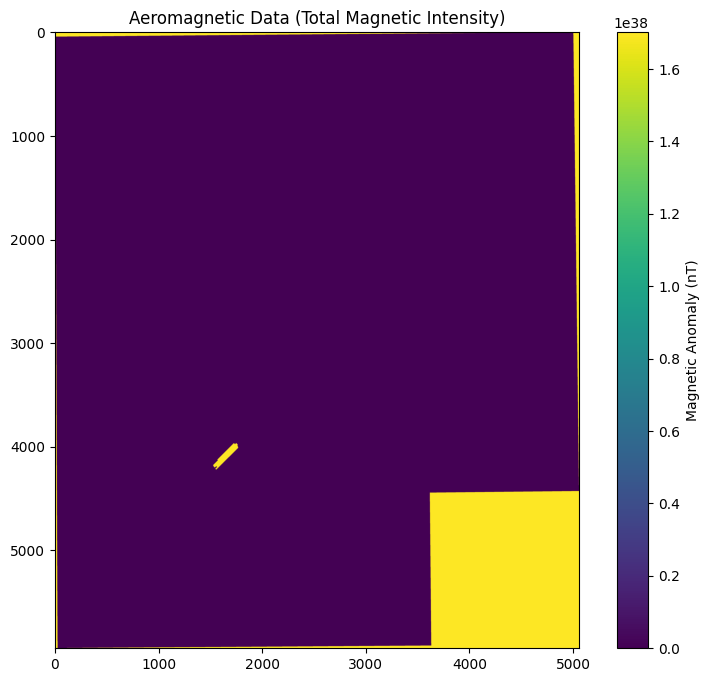

In [25]:
import rasterio
import matplotlib.pyplot as plt

# Load magnetic data (GeoTIFF)
magnetic_path = "../datasets/MAGNETIC/GRIDS/GEOTIFF/TAIL_TMI_GE.tiff"
with rasterio.open(magnetic_path) as src:
    magnetic_data = src.read(1)
    plt.figure(figsize=(10, 8))
    plt.imshow(magnetic_data, cmap='viridis')
    plt.colorbar(label='Magnetic Anomaly (nT)')
    plt.title("Aeromagnetic Data (Total Magnetic Intensity)")
    plt.savefig("magnetic_anomaly_map.png")

In [26]:
import numpy as np
import pandas as pd

# Get coordinates and values
with rasterio.open(magnetic_path) as src:
    transform = src.transform
    rows, cols = np.indices(src.shape)
    xs, ys = rasterio.transform.xy(transform, rows, cols)
    values = src.read(1)

# Create DataFrame
df_magnetic = pd.DataFrame({
    'X': np.array(xs).flatten(),
    'Y': np.array(ys).flatten(),
    'Magnetic_Anomaly': values.flatten()
})
df_magnetic.to_csv("magnetic_data_utm.csv", index=False)

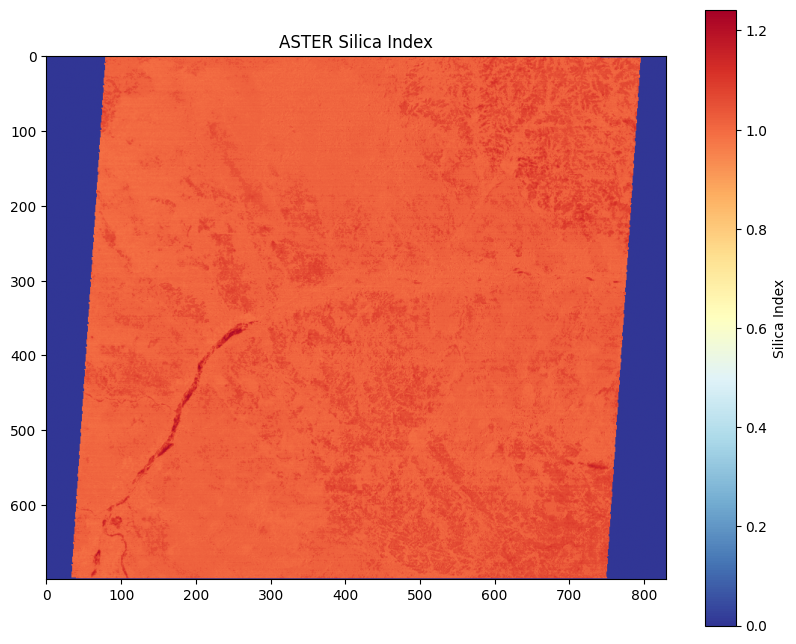

In [27]:
# Example: Load Silica Index (repeat for other minerals)
silica_path = "../datasets/Remotesening data/AST_05T TIR/1.Silica/Silica_Index_AST_05_00301142004053436_20231213134729_21762.tif"
with rasterio.open(silica_path) as src:
    silica_data = src.read(1)
    plt.figure(figsize=(10, 8))
    plt.imshow(silica_data, cmap='RdYlBu_r')
    plt.colorbar(label='Silica Index')
    plt.title("ASTER Silica Index")
    plt.savefig("silica_index_map.png")

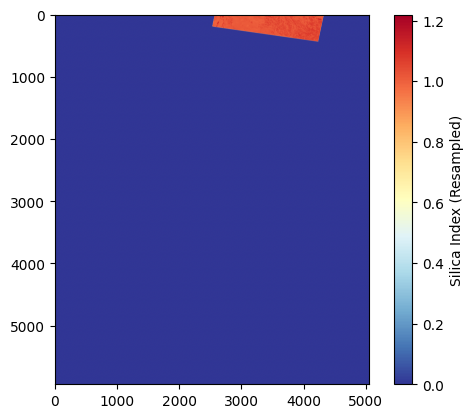

In [28]:
from rasterio.warp import reproject, Resampling

# Reproject ASTER to match magnetic grid (UTM Zone 43N)
with rasterio.open(magnetic_path) as target:
    target_crs = target.crs
    kwargs = target.meta.copy()

    with rasterio.open(silica_path) as src:
        kwargs.update({
            'transform': target.transform,
            'width': target.width,
            'height': target.height
        })
        silica_resampled = np.empty_like(magnetic_data)
        reproject(
            source=rasterio.band(src, 1),
            destination=silica_resampled,
            src_transform=src.transform,
            src_crs=src.crs,
            dst_transform=target.transform,
            dst_crs=target_crs,
            resampling=Resampling.bilinear
        )

# Save resampled data
plt.imshow(silica_resampled, cmap='RdYlBu_r')
plt.colorbar(label='Silica Index (Resampled)')
plt.savefig("silica_resampled.png")

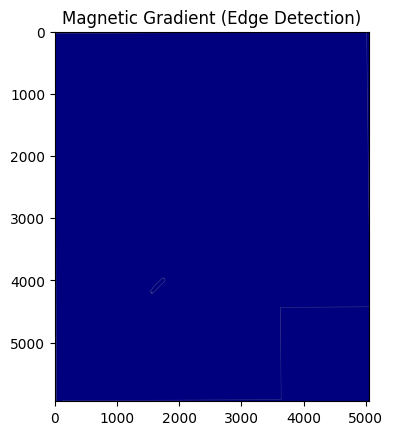

In [29]:
from scipy.ndimage import gaussian_filter, sobel

# Gaussian smoothing
magnetic_smoothed = gaussian_filter(magnetic_data, sigma=1)

# Calculate horizontal gradient (edge detection)
magnetic_gradient = np.hypot(
    sobel(magnetic_smoothed, axis=0),
    sobel(magnetic_smoothed, axis=1)
)
plt.imshow(magnetic_gradient, cmap='jet')
plt.title("Magnetic Gradient (Edge Detection)")
plt.savefig("magnetic_gradient.png")

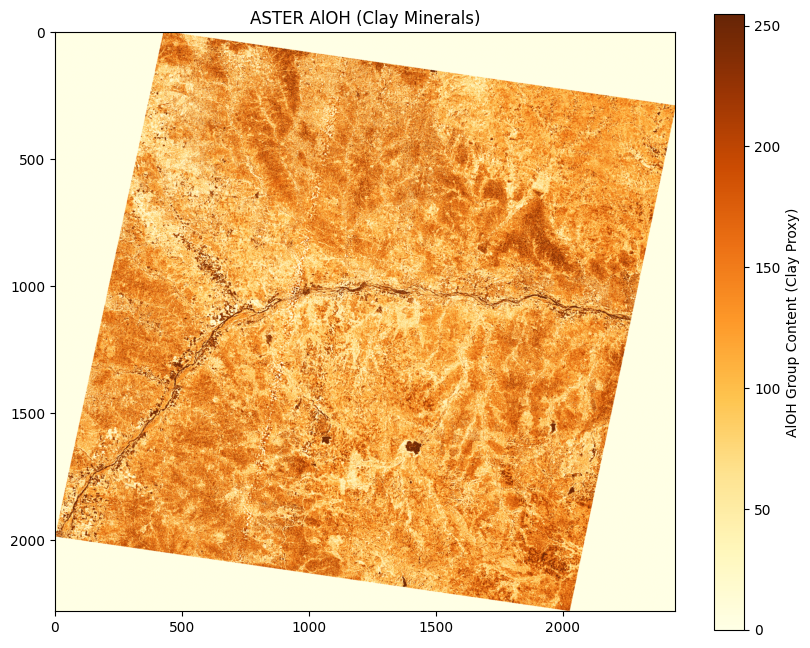

In [31]:
import rasterio
import numpy as np

# Load AlOH group content (clay proxy)
aloh_path = "../datasets/Remotesening data/AST_07XT VNIR+SWIR/8. AlOH group content (B5+B7_B6)/AlOH_group_content_AST_07XT_00301142004053436_20230602165004_2168.tif"
with rasterio.open(aloh_path) as src:
    aloh_data = src.read(1)
    aloh_transform = src.transform

# Visualize
plt.figure(figsize=(10, 8))
plt.imshow(aloh_data, cmap='YlOrBr')
plt.colorbar(label='AlOH Group Content (Clay Proxy)')
plt.title("ASTER AlOH (Clay Minerals)")
plt.savefig("clay_minerals_map.png")

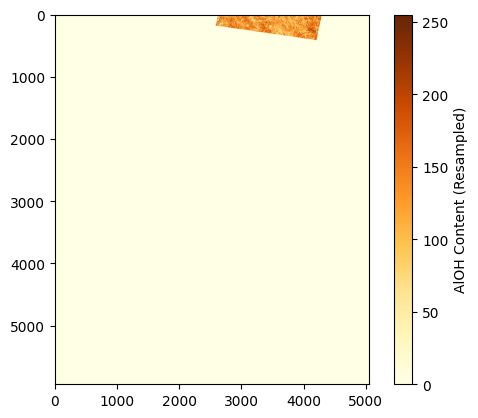

In [32]:
# Reproject AlOH data to match magnetic grid (UTM Zone 43N)
with rasterio.open(magnetic_path) as target:
    target_crs = target.crs
    aloh_resampled = np.empty_like(magnetic_data)
    
    # Open the AlOH dataset
    with rasterio.open(aloh_path) as src_aloh:
        reproject(
            source=rasterio.band(src_aloh, 1),
            destination=aloh_resampled,
            src_transform=aloh_transform,
            src_crs=src_aloh.crs,
            dst_transform=target.transform,
            dst_crs=target_crs,
            resampling=Resampling.bilinear
        )

# Save resampled data
plt.imshow(aloh_resampled, cmap='YlOrBr')
plt.colorbar(label='AlOH Content (Resampled)')
plt.savefig("aloh_resampled.png")

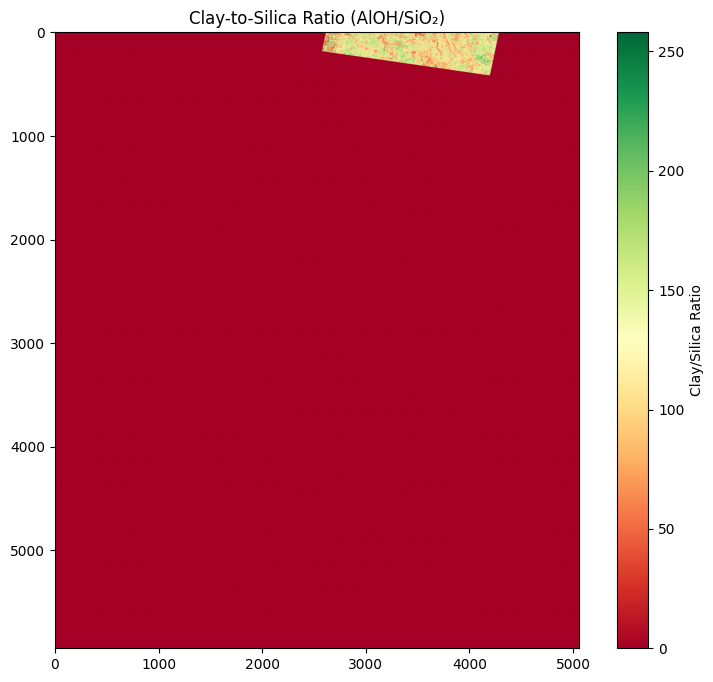

In [33]:
# Avoid division by zero
clay_silica_ratio = aloh_resampled / (silica_resampled + 1e-10)

# Visualize
plt.figure(figsize=(10, 8))
plt.imshow(clay_silica_ratio, cmap='RdYlGn')
plt.colorbar(label='Clay/Silica Ratio')
plt.title("Clay-to-Silica Ratio (AlOH/SiO₂)")
plt.savefig("clay_silica_ratio.png")

In [34]:
final_features = pd.DataFrame({
    'X': geochem_utm.geometry.x,
    'Y': geochem_utm.geometry.y,
    'Cu_ppm': geochem_utm['Cu_ppm'],
    'Cu_Zn_ratio': geochem_utm['Cu_Zn_ratio'],
    'Dist_to_Fault': geochem_utm['dist_to_fault'],
    'Magnetic_Anomaly': df_magnetic['Magnetic_Anomaly'],
    'Silica_Index': silica_resampled.flatten(),
    'Clay_Index': aloh_resampled.flatten(),  # AlOH = clay proxy
    'Clay_Silica_Ratio': clay_silica_ratio.flatten()
})

# Save to CSV
final_features.to_csv("final_features.csv", index=False)